In [2]:
import tensorflow as tf
from tensorflow import keras
from attention_dynamic_model import AttentionDynamicModel
from utils import create_data_on_disk
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# AM-D Model Parameters
embedding_dim   = 128
n_encode_layers = 2
n_heads         = 8
tanh_clipping   = 10

model_amd = AttentionDynamicModel(
    embedding_dim  =embedding_dim,
    n_encode_layers=n_encode_layers,
    n_heads        =n_heads,
    tanh_clipping  =tanh_clipping
)

model_amd.load_weights('checkpoints/AM-D_oct_19_20_nodes_50_iter_52000_batches_32_batch_size.ckp')

2022-10-19 18:19:43.075266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 18:19:43.116443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 18:19:43.116607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 18:19:43.117075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [4]:
data = create_data_on_disk(20, 100, False, None, True, 42)

In [5]:
data

<TensorSliceDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.float32, name=None), TensorSpec(shape=(20, 2), dtype=tf.float32, name=None), TensorSpec(shape=(20,), dtype=tf.float32, name=None))>

In [6]:
gen_data = next(data.batch(100).as_numpy_iterator())
sample   = 0
__type   = 1 # 0: space nodes, 1: depot node
graph    = pd.DataFrame(gen_data[__type][sample], columns=['x', 'y'])

goal = {
    'x': gen_data[0][sample][0], 
    'y': gen_data[0][sample][1], 
    'type': 'depot'
}

graph = graph.assign(type='node').append(goal, ignore_index=True)

graph

/tmp/ipykernel_75298/3437516333.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  graph = graph.assign(type='node').append(goal, ignore_index=True)


,x,y,type
0,0.657302,0.364328,node
1,0.118694,0.939067,node
2,0.074154,0.873417,node
3,0.253108,0.085860,node
4,0.706352,0.468738,node
5,0.776964,0.508429,node
6,0.570920,0.082506,node
7,0.419440,0.974805,node
8,0.945331,0.323978,node
9,0.450232,0.027604,node


<AxesSubplot: xlabel='x', ylabel='y'>

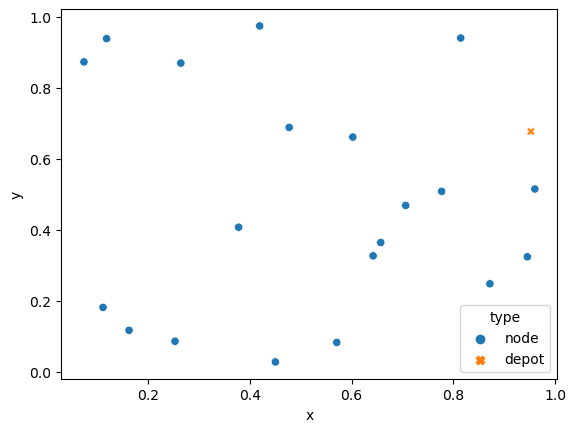

In [7]:
sns.scatterplot(data=graph, x='x', y='y', hue='type', style='type')

In [8]:
test_data = next(data.batch(5).as_numpy_iterator())
model_amd.set_decode_type('greedy')
res = model_amd(test_data, return_pi=True)

In [9]:
start_node = pd.DataFrame([test_data[0][0]])
space_nodes = pd.DataFrame(test_data[1][0])
nodes = pd.concat([start_node, space_nodes]).reset_index(drop=True)

In [10]:
selections = pd.DataFrame(res[2][0]).astype(int)

In [11]:
path = nodes.iloc[selections[0]]

In [12]:
path

,0,1
20,0.871795,0.247977
9,0.945331,0.323978
14,0.960132,0.515050
6,0.776964,0.508429
0,0.952271,0.677408
0,0.952271,0.677408
0,0.952271,0.677408
0,0.952271,0.677408
0,0.952271,0.677408
17,0.642343,0.326639


In [13]:
gen_data = test_data
sample   = 0
__type   = 1 # 0: space nodes, 1: depot node
graph    = pd.DataFrame(gen_data[__type][sample], columns=['x', 'y'])

goal = {
    'x': gen_data[0][sample][0], 
    'y': gen_data[0][sample][1], 
    'type': 'depot'
}

graph = graph.assign(type='node').append(goal, ignore_index=True)

graph

/tmp/ipykernel_75298/791374584.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  graph = graph.assign(type='node').append(goal, ignore_index=True)


,x,y,type
0,0.657302,0.364328,node
1,0.118694,0.939067,node
2,0.074154,0.873417,node
3,0.253108,0.085860,node
4,0.706352,0.468738,node
5,0.776964,0.508429,node
6,0.570920,0.082506,node
7,0.419440,0.974805,node
8,0.945331,0.323978,node
9,0.450232,0.027604,node


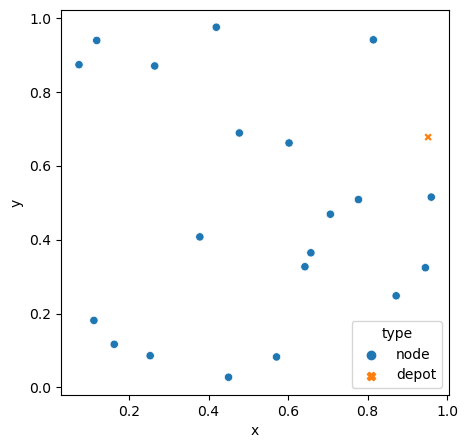

In [14]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=graph, x='x', y='y', hue='type', style='type')
plt.show()

/tmp/ipykernel_75298/3112368629.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=3, pivot="tip")


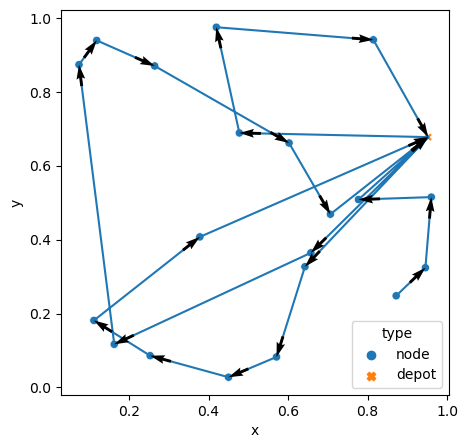

In [15]:
plt.figure(figsize=(5, 5))

x = path[0].values
y = path[1].values
u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/1
pos_y = y[:-1] + v/1
norm = np.sqrt(u**2+v**2)

#plt.scatter(path[0], path[1], zorder=1)
sns.scatterplot(data=graph, x='x', y='y', hue='type', style='type')
plt.plot(path[0], path[1], zorder=2)
plt.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=3, pivot="tip")

plt.show()